# **Aprendizado de Máquina Estatístico**
## **Seminário - Inferência Causal [Rubin]**
#### Integrantes: 

- Daniel Shinoda Pascoal
- Flavio Margarito Martins de Barros
- Gabriel Tupinamba da Cunha Leandro

## Conteúdo:

- 1 Introdução
- 2 O Modelo Causal de Rubin
- 3 Atribuição aleatória
- 4 Analise de Regressão de experimentos
- 5 Estudo de caso

## **Introdução**

**"Correlação não é igual a causalidade"**

<br>

Essa frase é um mantra na comunidade de estatística e ciência de dados, ela é repetida diversas vezes para nos manter longe da armadilha que é **confundir correlação com causalidade**. A palavra correlação, enquanto tem um significado definido em estatística é usado de forma coloquial na linguagem cotidiana significando, muitas vezes, relação. Entretando a correlação é um tipo especial de "relação" uma vez que usualmente, quando esse termo é utilizado, quer se dizer que há uma relação **linear**, assim como na correlação de Pearson. Mas, além de existirem outros tipos de correlações na estatística, como a correlação bisserial por exemplo, o fato de existir uma correlação diferente de zero **não implica** que há uma **relação de fato** entre as variáveis, tampouco que essa relação seja linear. O oposto também: o fato de uma correlação **ser nula não implica que não haja relação entre as variáveis**, uma vez que esta pode ser não linear. A maioria modelos de machine learning utilizados são ótimos para capturar a correlações presente nos dados, mas não nos auxiliam em interpretar o que causa os padrões observados, o que limita nossa capacidade de decisão. 

<br>

Dentro do mundo dos negócios é muito comum perguntas em que se deseja saber se determinado anúncio de marketing trouxe mais vendas na compania, muitas vezes um aumento das vendas pode estar mascarado por uma queda de preço ou de estoque no mercado. Esse problema também é muito comum em outras áreas como medicina onde precisamos entender se determinado tratamento realmente teve o efeito desejado ou na economia onde queremos saber se determinada politica trouxe efeitos positivos na renda dos índividuos. Não basta ter um modelo que seja capaz de produzir ótimas prediçõe, é necessário que, de alguma forma, entendamos as relações causais e sejamos capazes de compreender quais são os mecanismos geradores dos dados.

Para ajudar a entender os efeitos causais algumas metodologias tem sido utilizadas na literatura. Nesse documento iremos nos focar na abordagem **"Potential outcomes"** de **Donald Rubin**.

## **O Modelo Causal de Rubin**

Imagine a seguinte situação, um determinado indivíduo terminou sua graduação, e quando chegou aos seus quarenta anos possuia uma alta remuneração em comparação com a média da população. Caso esse mesmo indivíduo não tivesse terminado a graduação ele teria uma remuneração menor? Não temos como saber a resposta para essa pergunta pois teríamos que voltar ao passado para descobrir o que teria acontecido caso essa mesma pessoa não tivesse concluído essa graduação. Ainda assim, mesmo que fosse possível voltar no tempo e submeter esse indivíduo a um "tratamento" diferente, ainda haveria a possibilidade de o resultado ser fruto de situações aleatórias que poderia contribuir ou dificultar a vida desse indivíduo, tal que para realizar um experimento como esse deveríamos repetílo com um número significativo de pessoas. Acreditamos que é óbvio que uma abordagem como essa é impossível na prática, tal que temos que utilizar dados observacionais e a partir deles, utilizando algum método, tentar descobrir quais são as relações causais.

<br>

No cerne dessa situação encontramos o **"Problema Fundamental da Inferência Causal"**, que reside na impossibilidade de observarmos um individuo "com" e "sem" tratamento ao mesmo tempo. Por isso o **Modelo Causal de Rubin** , também conhecido como **"Potential Outcomes Model"** (Modelo de resultados potenciais) lida com a idéia de "Resultados Potenciais".

<br>

### Notação

Para contextualizar os conceitos apresentados vamos utilizar o dataset do artigo  de **Robert Lalonde** , *"Evaluating the Econometric Evaluations of Training Programs", American Economic Review, Vol. 76, pp. 604-620*, como estudo de caso, nesse estudo ele avalia o efeito de determinado treinamento no salário de dois grupos de indivíduos.

<br>

Vamos definir formalmente o conceito de "potential outcomes": denotemos como $\mathbf{T}$ o efeito do tratamento, que no nosso caso será se o índivíduo teve treinamento ou não, nesse caso $\mathbf{T}$ será uma variável binária $\mathbf{T(i)} = \mathbb{1(i)}_{\text{{1,0}}} $. 

<br>
Potential Outcomes: 

$
Y_{ti}=\begin{cases}
t=1 \ , \text{se o individuo i recebeu o tratamento}\\
t= 0 \ , \text{caso contrario}\\
\end{cases}
$

Ou de maneira mais geral : $Y_{0i} + (Y_{1i} - Y_{0i})T_i$

<br>

Dessa forma supomos que o individuo i tivesse recebido o treinamento, com isso teriamos o resultado potencial $Y_{1i}$ que representa sua remuneração após o tratamento, já $Y_{0i}$ seria o resultado potencial caso esse mesmo indivíduo não tivesse recebido o treinamento, que nesse caso seria um "salário imaginário" uma vez que não temos como saber o verdadeiro resultado, também podemos chamar $Y_{0i}$ de **Contrafactual**.

<br>

### Efeito Médio do Tratamento 

<br>

Essa notação é importante pois com ela podemos estabelecer que $Y_{1i} - Y_{0i}$  seria o efeito causado pelo treinamento no indivíduo i.

Dessa forma definiremos o **Efeito Médio do Tratamento** (EMT) dos indivíduos como:

- \\(EMT = E[Y_{1i} - Y_{0i}]\\)


Também vamos definir como **Efeito Médio do Tratamento nos Tratados** (EMTT) o efeito médio do tratamento condicionado apenas nos indivíduos que receberam treinamento. 

- \\(EMTT = E[Y_{1i} - Y_{0i} | T=1]\\)

<br>

## **Atribuição aleatória e o viés de seleção**

É claro que as equações acima são apenas **hipotéticas**, não temos como obter esses resultados pois não podemos voltar no passado. Uma suposição ingênua seria estimar o efeito causado pelo treinamento subtraindo o salario dos individuos que receberam treinamento daqueles que não receberam treinamento (grupo controle), umas vez que o único resultado potencial que de fato temos acesso (observamos o efeito) é $E[Y_{1i}|T=1]$ e $E[Y_{0i}|T=0]$ em outras palavras seria assumir $E[Y_{1i}|T=1] - E[Y_{0i}|T=0]$ como o efeito causado pelo treinamento.

<br>

A demonstração abaixo nos mostra o problema dessa abordagem ingênua, se somarmos e subtrairmos o contrafactual $E[Y_{0i}|T=1]$ na nossa equação, teremos:

$
E[Y_{1i}|T=1] - E[Y_{0i}|T=0] = E[Y_{1i}|T=1] - E[Y_{0i}|T=0] +E[Y_{0i}|T=1] - E[Y_{0i}|T=1]
$

$
E[Y_{1i}|T=1] - E[Y_{0i}|T=0] = \underbrace{E[Y_{1i} - Y_{0i}|T=1]}_{EMTT } + \underbrace{\{ E[Y_{0i}|T=1] - E[Y_{0i}|T=0] \}}_{Viés}
$

Ou seja subtrair o resultado observado do grupo tratado com o resultado observado do grupo não tratado é igual ao efeito médio do tratamento nos tratados, que queremos descobrir, mais o **viés de seleção**, que é o efeito de não fazer nada em ambos os grupos.

No nosso exemplo um possivel viés de seleção seria selecionar para o treinamento $T=1$, grupos que naturalmente já teriam um salario melhor mesmo sem treinamento, por exemplo por terem ido a faculdade e no grupo sem treinamento $T=0$, indivíduos que não completaram a faculdade.

<br>

### Atribuição aleatória

A grande sacada aqui é que caso o viés de seleção seja zero ou próximo de zero, a difença do efeito do grupo com treinamento e sem treinamento de fato será igual ao efeito médio do tratamento no grupo tratado (EMTT).

Dessa maneira selecionando aleatoriamente os dois grupos de indivíduos, o viés seria reduzido a zero e com isso:

$
E[Y_{1i}|T=1] - E[Y_{0i}|T=0] = E[Y_{1i} - Y_{0i}|T=1] = EMTT
$

<br>

## **Análise de Regressão dos Experimentos**

Nós podemos remodelar a nossa equação de potential outcomes $Y_{0i} + (Y_{1i} - Y_{0i})T_i$ como um problema de regressão, somando e subtraindo $E[Y_{0i}]$ temos:

$$
Y_i = \underbrace{\alpha}_{E[Y_{0i}]} + \underbrace{\rho}_{Y_{1i} - Y_{0i}}T_i + \underbrace{\eta}_{Y_{0i}-E[Y_{0i}]}
$$

Aplicando o valor esperado para os grupos tratamento e controle:

$ E[Y_i |T_i = 1] = \alpha + \rho + E[\eta_i|T_i=1]$

$ E[Y_i |T_i = 0] = \alpha + E[\eta_i|T_i=0]$

Então:

$
E[Y_{i}|T=1] - E[Y_{i}|T=0] = \rho + \underbrace{\{ E[\eta_i|T=1] - E[\eta_i|T=0] \}}_{Viés}
$

Dessa maneira se a atribuição for aleatória, eliminamos o viés de seleção e teremos: 

$E[Y_{i}|T=1] - E[Y_{i}|T=0] = \rho $

Isso nos fornece uma valiosa ferramenta, uma vez que ao calcular uma simples regressão linear nosso coeficiente $\rho$ será igual ao efeito médio do tratamento.

## **Estudo de Caso**

Como mencionado acima, esse dataset foi utilizado pelo economista Robert Lalonde, onde ele analisou o efeito de determinado treinamento na renda de um grupo de individuos, no ano de 1975 e em 1978 após o treinamento, parte do grupo recebeu o treinamento (Tratados) e o outro não (Controle).

O dataset é composto pelas covariáveis: 

- 'treatment_indicator', 1 se tratado 0 se não
- 'age', idade
- 'education', anos de escolaridade
- 'Black', 1 se negro e 0 se não
- 'Hispanic', 1 se hispanico e 0 se não
- 'Married', 1 se casado, 0 se não
- 'nodegree', 1 se cursou ensino superior, 0 se não
- 'RE75', renda em 1975
- 'RE78', renda em 1978



In [10]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
#df = pd.read_csv("TMDb_updated.CSV")

df_control = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprend Maq Est/nsw_control.txt", sep="  ", header=None)
df_control.columns= ['treatment_indicator','age','education','Black','Hispanic','Married','nodegree','RE75','RE78']

df_treated = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprend Maq Est/nsw_treated.txt", sep="  ", header=None)
df_treated.columns= ['treatment_indicator','age','education','Black','Hispanic','Married','nodegree','RE75','RE78']

df = pd.concat([df_control, df_treated])

#df_control = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprend Maq Est/nswre74_control.txt", sep="  ", header=None)
#df_control.columns= ['treatment_indicator','age','education','Black','Hispanic','Married','nodegree','RE74','RE75','RE78']

#df_treated = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprend Maq Est/nswre74_treated.txt", sep="  ", header=None)
#df_treated.columns= ['treatment_indicator','age','education','Black','Hispanic','Married','nodegree','RE74','RE75','RE78']
#df = pd.concat([df_control, df_treated])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


In [12]:
df.groupby('treatment_indicator')['RE78'].agg(['median','mean'])

,median,mean
treatment_indicator,,
0.0,3746.701,5090.048302
1.0,4232.309,5976.352033


Como podemos ver, apenas agregando os dados aparentemente o grupo que recebeu o tratamento tiveram uma renda maior em 1978 do que o grupo que não foi tratado.

In [18]:
df.groupby('treatment_indicator')['RE78'].count()

treatment_indicator
0.0    260
1.0    185
Name: RE78, dtype: int64

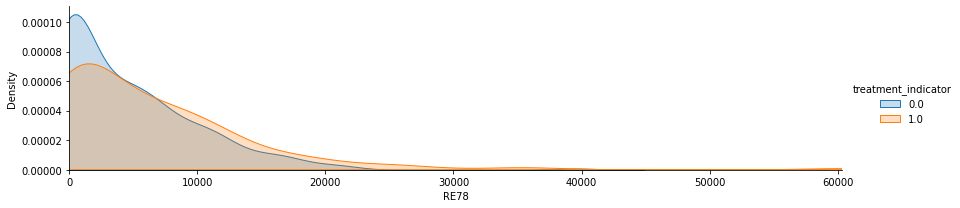

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

a = sns.FacetGrid( df, hue = 'treatment_indicator', aspect=4)
a.map(sns.kdeplot, 'RE78', shade= True )
a.set(xlim=(0 , df['RE78'].max()))
a.add_legend()

Como podemos ver, esse dataset não está balanceado, temos muito mais pessoas sem tratamento, além disso as pessoas sem tratamento estão mais concentradas na faixa de renda inferior.

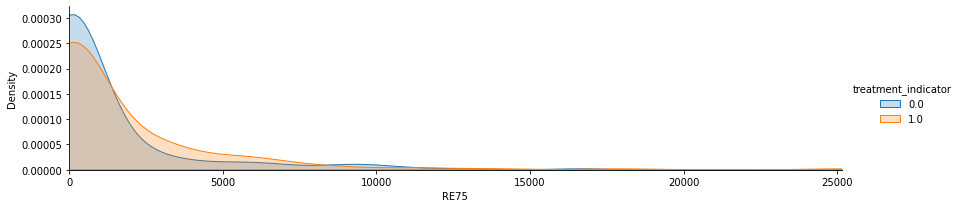

In [22]:
a = sns.FacetGrid( df, hue = 'treatment_indicator', aspect=4)
a.map(sns.kdeplot, 'RE75', shade= True )
a.set(xlim=(0 , df['RE75'].max()))
a.add_legend()

Mesmo no ponto de partida do estudo, a renda em 1975 do grupo controle já era mais concentrada na faixa inferior no grupo controle

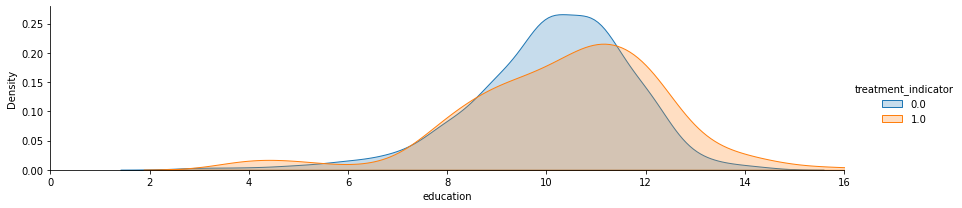

In [24]:
a = sns.FacetGrid( df, hue = 'treatment_indicator', aspect=4)
a.map(sns.kdeplot, 'education', shade= True )
a.set(xlim=(0 , df['education'].max()))
a.add_legend()

Como podemos ver o grupo tratado possui mais anos de educação do que aqueles do grupo controle.

## Referências

- https://en.wikipedia.org/wiki/Rubin_causal_model
- https://jonnyphillips.github.io/FLS6415/Class_3/Angrist%20&%20Pischke.pdf